# RegressionUsingNeuralNetworks_ElectronAndTelDomain

Data Set Provided

signal-data.csv


DOMAIN:Electronics & Telecommunication


# Context:
 A communications equipment manufacturing company has a product which is responsible for emitting 
informative signals. Company wants to build a machine learning model which can help the company to predict the 
equipment’s signal quality using various parameters

Objective : The need is to build a regressor which can use these parameters to determine the signal strength or 
quality [as number].

# About the Data:
The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

# Legend

 ### Insights/inferences/results have been displayed post each step

In [323]:
# Useful Setting

## 1.0 EDA 

### 1.1 Import necessary libraries

In [324]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import statistics as stats
sns.set(color_codes=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Last import allows multiple outputs from one cell
import warnings
# Initialize the random number generator
import random
random.seed(0)

In [325]:
# Useful Configuration/Setting

In [326]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

#Setting to shows all entries in array displayed
np.set_printoptions(threshold=sys.maxsize)

### 1.2 Read the data as a data frame & make a copy of DS

In [327]:
# Read The Data Set
signalDataDSOrig = pd.read_csv("../DataSet_Storage/SignalData_DontModify.csv")
signalDataDS=signalDataDSOrig.copy()
signalDataDS.head(5)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4000000,0.7000000,0.0000000,1.9000000,0.0760000,11.0000000,34.0000000,0.9978000,3.5100000,0.5600000,9.4000000,5
1,7.8000000,0.8800000,0.0000000,2.6000000,0.0980000,25.0000000,67.0000000,0.9968000,3.2000000,0.6800000,9.8000000,5
2,7.8000000,0.7600000,0.0400000,2.3000000,0.0920000,15.0000000,54.0000000,0.9970000,3.2600000,0.6500000,9.8000000,5
3,11.2000000,0.2800000,0.5600000,1.9000000,0.0750000,17.0000000,60.0000000,0.9980000,3.1600000,0.5800000,9.8000000,6
4,7.4000000,0.7000000,0.0000000,1.9000000,0.0760000,11.0000000,34.0000000,0.9978000,3.5100000,0.5600000,9.4000000,5


### 1.3 Check Shape


In [328]:
signalDataDS.shape

(1599, 12)

### 1.4 Get information about the features/columns

In [329]:
 signalDataDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


###  1.5 Get a 5 point summary

In [330]:
#Preliminary describe , we would need to run this command again once we have cleaned up/updated /modified data
signalDataDS.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.0000000,1599.0000000,1599.0000000,1599.0000000,1599.0000000,1599.0000000,1599.0000000,1599.0000000,1599.0000000,1599.0000000,1599.0000000,1599.0000000
mean,8.3196373,0.5278205,0.2709756,2.5388055,0.0874665,15.8749218,46.4677924,0.9967467,3.3111132,0.6581488,10.4229831,5.6360225
std,1.7410963,0.1790597,0.1948011,1.4099281,0.0470653,10.4601570,32.8953245,0.0018873,0.1543865,0.1695070,1.0656676,0.8075694
min,4.6000000,0.1200000,0.0000000,0.9000000,0.0120000,1.0000000,6.0000000,0.9900700,2.7400000,0.3300000,8.4000000,3.0000000
25%,7.1000000,0.3900000,0.0900000,1.9000000,0.0700000,7.0000000,22.0000000,0.9956000,3.2100000,0.5500000,9.5000000,5.0000000
50%,7.9000000,0.5200000,0.2600000,2.2000000,0.0790000,14.0000000,38.0000000,0.9967500,3.3100000,0.6200000,10.2000000,6.0000000
75%,9.2000000,0.6400000,0.4200000,2.6000000,0.0900000,21.0000000,62.0000000,0.9978350,3.4000000,0.7300000,11.1000000,6.0000000
max,15.9000000,1.5800000,1.0000000,15.5000000,0.6110000,72.0000000,289.0000000,1.0036900,4.0100000,2.0000000,14.9000000,8.0000000


### Inference/Result for the above section (Eyeballing data)

#### As can be seen from the above steps , the final is a data set of 1599 rows/records and 12 attributes/columns

#### The data type are as follows : All attributes except target variable  are of type float .Target is of type int

#### There are NO standards null values present  in the data 

#### We do not know what the attributes signify and all the attributes are in different ranges. Scaling would be required which will be done at a later stage

## 2.0 Explore each feature/Univariate Analyses/Data Cleansing
Understand  this attribute

If attribute sequence number-check for duplicates and then drop. Any other irrelevant coumns, drop them

Get a Five point Summary of the attribute

Get the distribution of this attribute

Check the skewness of this attribute

Check for Outliers of this attribute.Handle if necessary based on the problem/algorithm to be used

Check for Standard/Non Standard null Values/Missing Values of this attribute & perform imputation if required

After correction of missing values/null values , check if this attribute needs to be converted to approproate data type

Is the variable a categorical one ? If Yes ,check whether it requires either encoding or a correction in encoding 

Get the five point summary again , on pre-processed/cleaned up data

Detail all the inferences from the above EDA & Preprocessing

###  2.1 Check on irrelevant columns

In [331]:
## There are no  irrelevant columns that can be dropped

###  2.2 Check on presence of standard null values

In [332]:
# Lets begin with standard null values

In [333]:
signalDataDS.isna().sum().sum()

0

In [334]:
# No Null Values found 

### 2.3 Check on the presence of non standard null values 

In [335]:
len(signalDataDS.columns)

12

In [336]:
# We 11 float attributes and 1 int attribute 
# Lets check if there are any undesirable values or non standard null values for all attributes

def isValidFloat(ip):
    if( isinstance(ip, float)):
        return True
    else:
        return False 

def isValidInt(ip):
    if( isinstance(ip, int)):
        return True
    else:
        return False 

In [337]:
for i in range(0,len(signalDataDS.columns)):
    # Last columns is an  integer so using other func
    if(i==len(signalDataDS.columns)-1):
         print(signalDataDS.iloc[:,i].apply(isValidInt).sum())
    else:
         # All other columns are floats
        print(signalDataDS.iloc[:,i].apply(isValidFloat).sum())


1599
1599
1599
1599
1599
1599
1599
1599
1599
1599
1599
1599


In [338]:
# Data is free of non standard null values, we can proceed 

###  2.4 Check on the presence of Outliers

<AxesSubplot:>

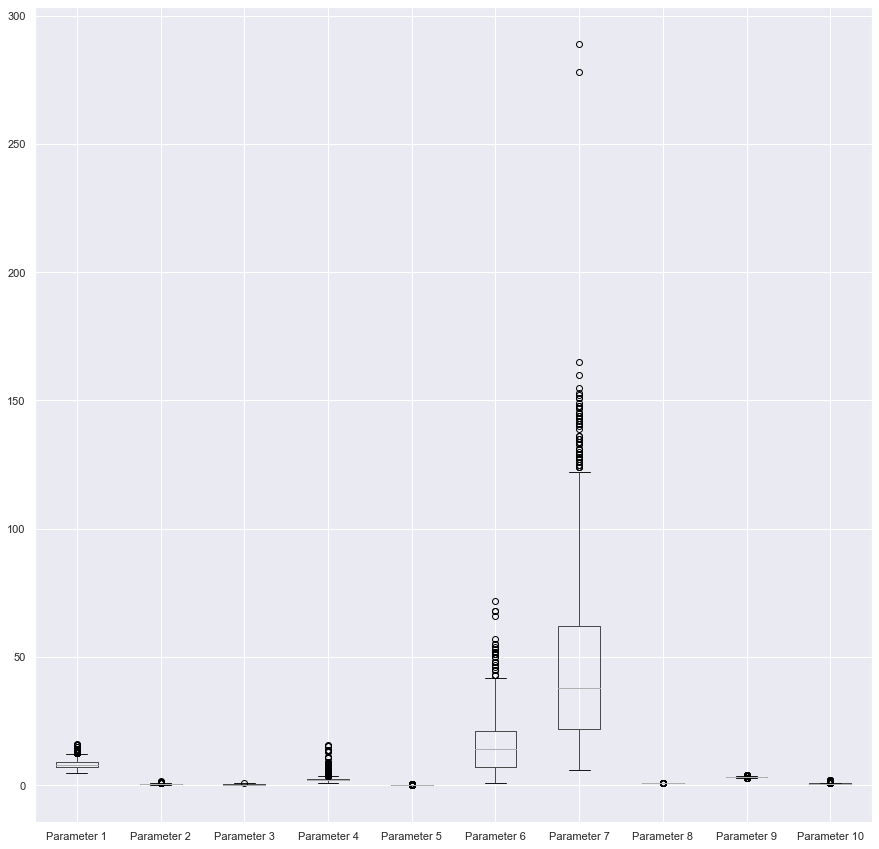

In [339]:
# Lets do a check on first 5 variables to get an idea of outliers , just to get an idea 
signalDataDS.iloc[:,0:10].boxplot(figsize=(15,15))

<AxesSubplot:xlabel='Parameter 1'>

<AxesSubplot:xlabel='Parameter 2'>

<AxesSubplot:xlabel='Parameter 3'>

<AxesSubplot:xlabel='Parameter 4'>

<AxesSubplot:xlabel='Parameter 5'>

<AxesSubplot:xlabel='Parameter 6'>

<AxesSubplot:xlabel='Parameter 7'>

<AxesSubplot:xlabel='Parameter 8'>

<AxesSubplot:xlabel='Parameter 9'>

<AxesSubplot:xlabel='Parameter 10'>

<AxesSubplot:xlabel='Parameter 11'>

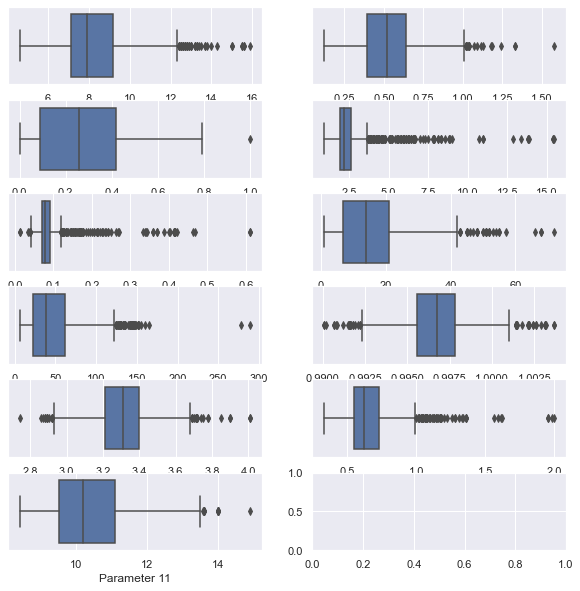

In [340]:
#Another visualization
# Lets do a check on first 5 variables to get an idea of outliers , just to get an idea 

fig, ax = plt.subplots(ncols=2,nrows=6,figsize=(10,10))
sns.boxplot(signalDataDS.iloc[:,0],ax=ax[0,0])
sns.boxplot(signalDataDS.iloc[:,1],ax=ax[0,1])
sns.boxplot(signalDataDS.iloc[:,2],ax=ax[1,0])
sns.boxplot(signalDataDS.iloc[:,3],ax=ax[1,1])
sns.boxplot(signalDataDS.iloc[:,4],ax=ax[2,0])
sns.boxplot(signalDataDS.iloc[:,5],ax=ax[2,1])
sns.boxplot(signalDataDS.iloc[:,6],ax=ax[3,0])
sns.boxplot(signalDataDS.iloc[:,7],ax=ax[3,1])
sns.boxplot(signalDataDS.iloc[:,8],ax=ax[4,0])
sns.boxplot(signalDataDS.iloc[:,9],ax=ax[4,1])
sns.boxplot(signalDataDS.iloc[:,10],ax=ax[5,0])

In [341]:
#Ouliers present , need to ne handled. We will run all variable through outlier handling.
#If variables have outliers , they will be taken care of , if variables do not have outliers , no action will be taken


#Strategy for outliers - We will perform a capping for all outliers 

In [342]:

# Function to take care of outliers
#outliers at the upper end will be replaced by the upper whisker
#outliers at the lower end will be replaced by the lower whisker
def handleOutliers(columnIndex , columnInput , varOutlierTrackingDS):
    #Lets first identify whiskers for this(current) feature
    upper_quartile = np.percentile(columnInput, 75)
    lower_quartile = np.percentile(columnInput, 25)
    iqr = upper_quartile - lower_quartile
    
    # Set conventional whiskers
    upper_whisker = upper_quartile+1.5*iqr
    lower_whisker = lower_quartile-1.5*iqr
    
    #Check if whiskers need to overwritten
    colMax=columnInput.max()
    colMin=columnInput.min()
    if(colMax > upper_quartile and  colMax < upper_whisker):
        upper_whisker=colMax
    if(colMin < lower_quartile and  colMin > lower_whisker):
        lower_whisker=colMin
        
    #Identify and replace ouliers
    countOfOutliers=0
    for j in range(len(columnInput)):
        if(columnInput[j] > upper_whisker):
            columnInput[j]=upper_whisker
            countOfOutliers=countOfOutliers+1
        if(columnInput[j] < lower_whisker):
            columnInput[j]=lower_whisker
            countOfOutliers=countOfOutliers+1
            
    #Lets add each feature and no of outliers handled in each one into DF for tracking purpose
    varOutlierTrackingDS=varOutlierTrackingDS.append({'Feature_Label':columnIndex,'NoOfOutliersHandled':countOfOutliers,'UpWhisker':upper_whisker,'LowWhisker':lower_whisker},ignore_index=True)
    return varOutlierTrackingDS 

In [343]:

# Data structure to keep track of outliers
varOutlierTrackingDS=pd.DataFrame(columns=['Feature_Label','NoOfOutliersHandled','UpWhisker','LowWhisker'])

#Outer loop for all columns
varDSColList=np.arange(0,signalDataDS.columns.size-1,1)

for i in varDSColList:
    temp=signalDataDS.iloc[:,i]
    varOutlierTrackingDS=handleOutliers(i,temp,varOutlierTrackingDS)
    
#Lets have a look at the data on outliers  
varOutlierTrackingDS
#Lets check how many variables contained outliers that were replaced
#varOutlierTrackingDS[varOutlierTrackingDS['NoOfOutliersHandled'] != 0.0] 

,Feature_Label,NoOfOutliersHandled,UpWhisker,LowWhisker
0,0.0000000,49.0000000,12.3500000,4.6000000
1,1.0000000,19.0000000,1.0150000,0.1200000
2,2.0000000,1.0000000,0.9150000,0.0000000
3,3.0000000,155.0000000,3.6500000,0.9000000
4,4.0000000,112.0000000,0.1200000,0.0400000
5,5.0000000,30.0000000,42.0000000,1.0000000
6,6.0000000,55.0000000,122.0000000,6.0000000
7,7.0000000,45.0000000,1.0011875,0.9922475
8,8.0000000,35.0000000,3.6850000,2.9250000
9,9.0000000,59.0000000,1.0000000,0.3300000


In [344]:
# All features contained outliers which were handled

<AxesSubplot:xlabel='Parameter 1'>

<AxesSubplot:xlabel='Parameter 2'>

<AxesSubplot:xlabel='Parameter 3'>

<AxesSubplot:xlabel='Parameter 4'>

<AxesSubplot:xlabel='Parameter 5'>

<AxesSubplot:xlabel='Parameter 6'>

<AxesSubplot:xlabel='Parameter 7'>

<AxesSubplot:xlabel='Parameter 8'>

<AxesSubplot:xlabel='Parameter 9'>

<AxesSubplot:xlabel='Parameter 10'>

<AxesSubplot:xlabel='Parameter 11'>

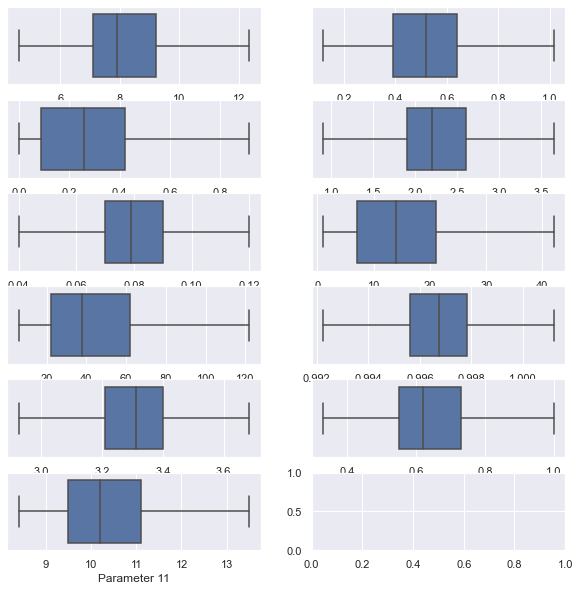

In [345]:
#Another visualization
# Lets do a check on  11 independant variables to get an idea of outliers , just to get an idea 

fig, ax = plt.subplots(ncols=2,nrows=6,figsize=(10,10))
sns.boxplot(signalDataDS.iloc[:,0],ax=ax[0,0])
sns.boxplot(signalDataDS.iloc[:,1],ax=ax[0,1])
sns.boxplot(signalDataDS.iloc[:,2],ax=ax[1,0])
sns.boxplot(signalDataDS.iloc[:,3],ax=ax[1,1])
sns.boxplot(signalDataDS.iloc[:,4],ax=ax[2,0])
sns.boxplot(signalDataDS.iloc[:,5],ax=ax[2,1])
sns.boxplot(signalDataDS.iloc[:,6],ax=ax[3,0])
sns.boxplot(signalDataDS.iloc[:,7],ax=ax[3,1])
sns.boxplot(signalDataDS.iloc[:,8],ax=ax[4,0])
sns.boxplot(signalDataDS.iloc[:,9],ax=ax[4,1])
sns.boxplot(signalDataDS.iloc[:,10],ax=ax[5,0])

### Result/Inference
#### All 11 input features  contained outliers which were taken care of
#### The above table lists which features contained outliers and the no of outliers it had

###  2.5 Check Distributions

<AxesSubplot:ylabel='Density'>

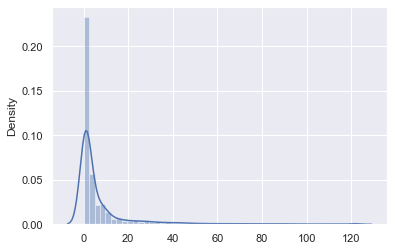

In [346]:
# Lets have a quick look at the distributions of 11 input params
sns.distplot(signalDataDS.iloc[:,0:10])

<AxesSubplot:xlabel='Parameter 1', ylabel='Density'>

<AxesSubplot:xlabel='Parameter 2', ylabel='Density'>

<AxesSubplot:xlabel='Parameter 3', ylabel='Density'>

<AxesSubplot:xlabel='Parameter 4', ylabel='Density'>

<AxesSubplot:xlabel='Parameter 5', ylabel='Density'>

<AxesSubplot:xlabel='Parameter 6', ylabel='Density'>

<AxesSubplot:xlabel='Parameter 7', ylabel='Density'>

<AxesSubplot:xlabel='Parameter 8', ylabel='Density'>

<AxesSubplot:xlabel='Parameter 9', ylabel='Density'>

<AxesSubplot:xlabel='Parameter 10', ylabel='Density'>

<AxesSubplot:xlabel='Parameter 11', ylabel='Density'>

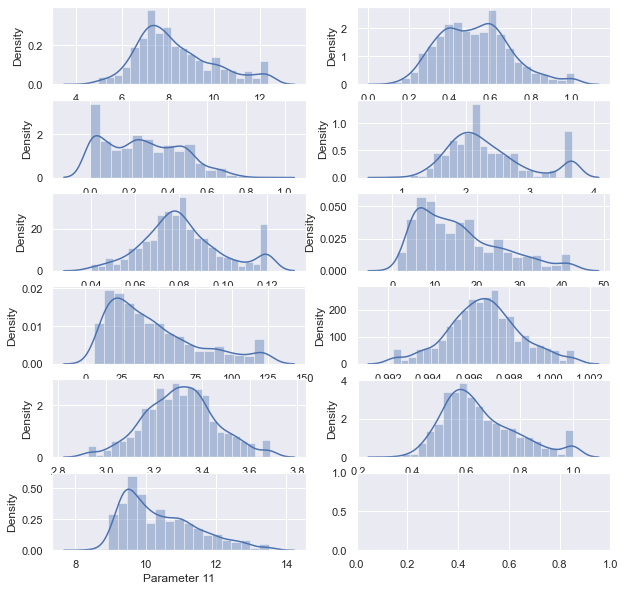

In [347]:
#Another visualization
# Lets check the distribution of 11 independant variables

fig, ax = plt.subplots(ncols=2,nrows=6,figsize=(10,10))
sns.distplot(signalDataDS.iloc[:,0],ax=ax[0,0])
sns.distplot(signalDataDS.iloc[:,1],ax=ax[0,1])
sns.distplot(signalDataDS.iloc[:,2],ax=ax[1,0])
sns.distplot(signalDataDS.iloc[:,3],ax=ax[1,1])
sns.distplot(signalDataDS.iloc[:,4],ax=ax[2,0])
sns.distplot(signalDataDS.iloc[:,5],ax=ax[2,1])
sns.distplot(signalDataDS.iloc[:,6],ax=ax[3,0])
sns.distplot(signalDataDS.iloc[:,7],ax=ax[3,1])
sns.distplot(signalDataDS.iloc[:,8],ax=ax[4,0])
sns.distplot(signalDataDS.iloc[:,9],ax=ax[4,1])
sns.distplot(signalDataDS.iloc[:,10],ax=ax[5,0])

### 2.6  Check Target Variable

<AxesSubplot:xlabel='Signal_Strength', ylabel='count'>

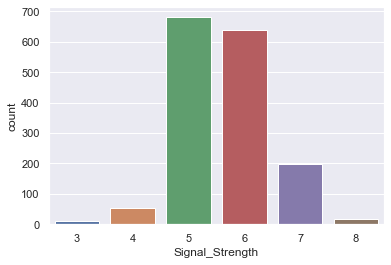

In [348]:
sns.countplot(signalDataDS['Signal_Strength'])

### Inference/Result for section 2 : Data Cleansing ,Eliminating feaures if required 

#### NO  features were eliminated.
####  Data was cleansed , outliers were handled
#### Data is ready for further processing

### 3.0 Bivariate Analysis/Multivariate Analyses

###  3.1  Pair Plot

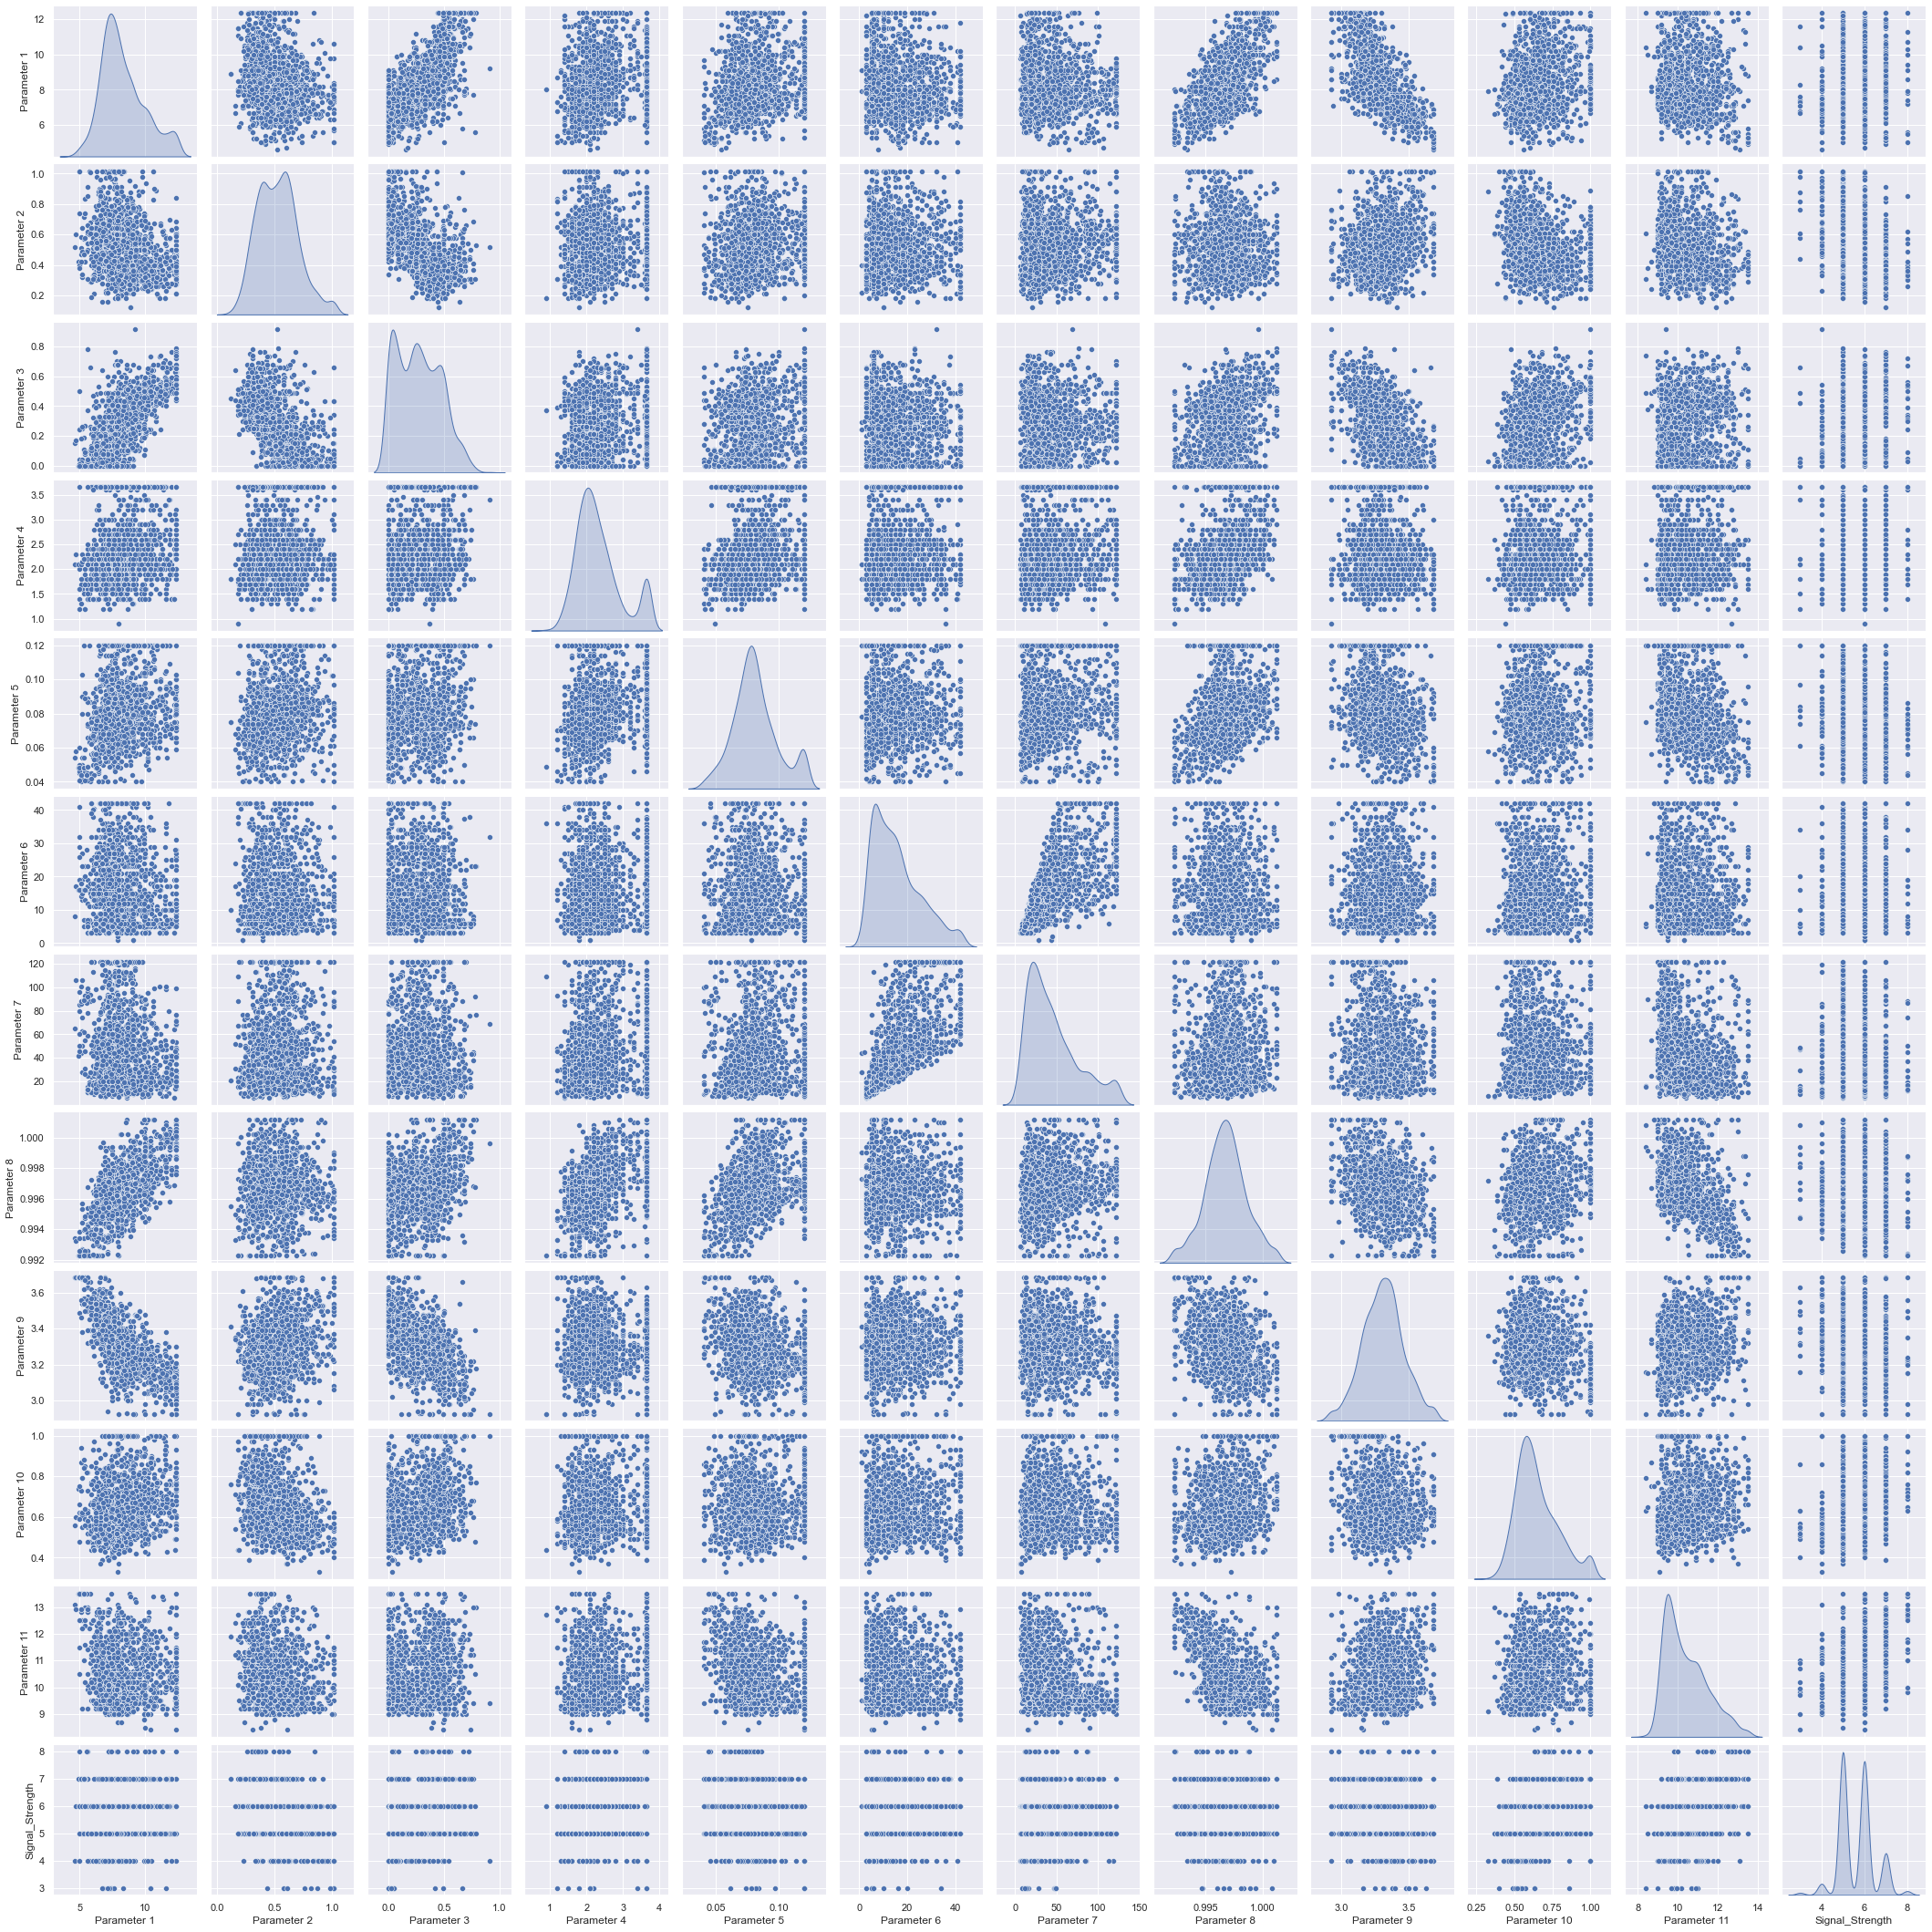

In [349]:
# Pair plots
#We will be unable to view 200 odd variables , we will view a subset of 10 at a time in 2 plots just to get an idea
#sns.pairplot(signalDataDS.iloc[:,0:10],hue=signalDataDS['Pass/Fail'],diag_kind="kde")
sns.pairplot(signalDataDS,diag_kind="kde")

###  3.2 Correlation Matrix

In [350]:
# Correlation matrix
corrMat=signalDataDS.corr()
corrMat

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.0000000,-0.2681533,0.6787041,0.2150898,0.2284839,-0.1570831,-0.1194856,0.6680756,-0.6898242,0.2151955,-0.0702424,0.1254418
Parameter 2,-0.2681533,1.0000000,-0.5607696,0.0394268,0.1330963,-0.0052877,0.0915834,0.0173470,0.2353473,-0.3161812,-0.2093854,-0.3876082
Parameter 3,0.6787041,-0.5607696,1.0000000,0.1835527,0.1476676,-0.0601400,0.0192773,0.3698925,-0.5460018,0.3334016,0.1116404,0.2271444
Parameter 4,0.2150898,0.0394268,0.1835527,1.0000000,0.2084711,0.0829325,0.1572502,0.4243544,-0.0945843,0.0349957,0.1071145,0.0237903
Parameter 5,0.2284839,0.1330963,0.1476676,0.2084711,1.0000000,-0.0121686,0.0980542,0.4074408,-0.2595122,0.1076453,-0.2956079,-0.1830368
Parameter 6,-0.1570831,-0.0052877,-0.0601400,0.0829325,-0.0121686,1.0000000,0.6871845,-0.0340124,0.0754150,0.0490856,-0.0680990,-0.0506407
Parameter 7,-0.1194856,0.0915834,0.0192773,0.1572502,0.0980542,0.6871845,1.0000000,0.0958712,-0.0518626,-0.0032293,-0.2288605,-0.2015425
Parameter 8,0.6680756,0.0173470,0.3698925,0.4243544,0.4074408,-0.0340124,0.0958712,1.0000000,-0.3368699,0.1613100,-0.5002372,-0.1763301
Parameter 9,-0.6898242,0.2353473,-0.5460018,-0.0945843,-0.2595122,0.0754150,-0.0518626,-0.3368699,1.0000000,-0.1347023,0.1951962,-0.0615069
Parameter 10,0.2151955,-0.3161812,0.3334016,0.0349957,0.1076453,0.0490856,-0.0032293,0.1613100,-0.1347023,1.0000000,0.1553103,0.3287104


<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

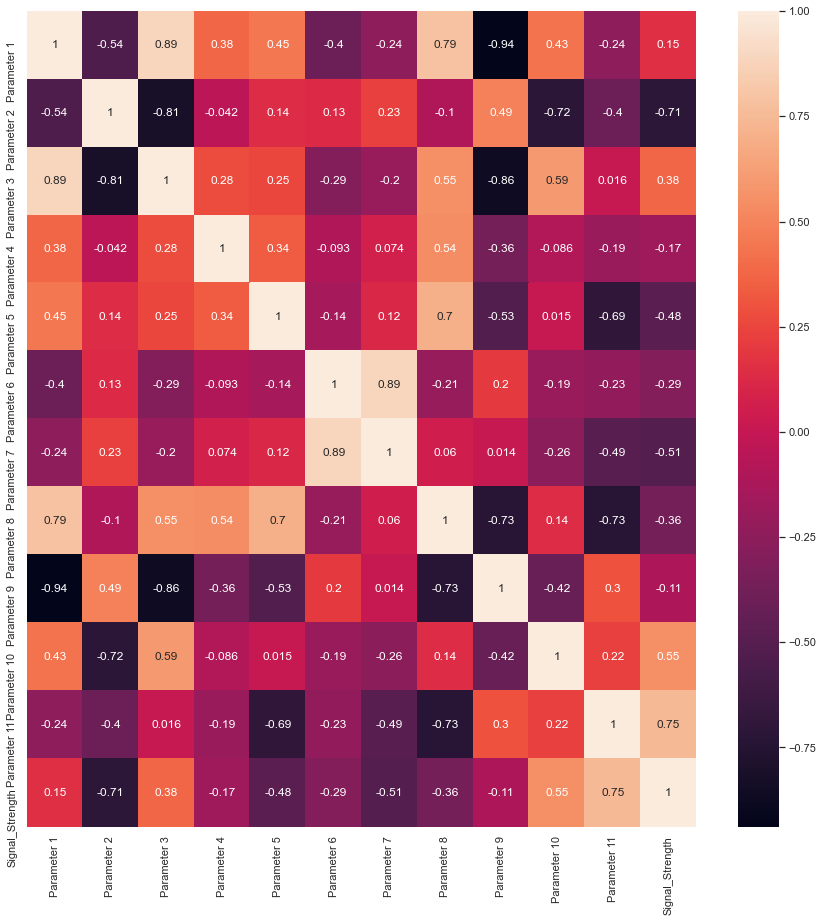

In [351]:
# Heat Map
#Heat Map of Correlation Matrix
plt.figure(figsize=(15,15))
sns.heatmap(corrMat.corr(), annot=True )  # heatmap
plt.show()

### Inference/Result for 3.0

####  Visual analysis of scatter plots:
##### -There seem to be atleast 3 groups/clusters amongst the variables that we have viewed

#### Some variables are higly correlated , some are not correlated with each other 

#### Variables Param2 and Param 11 seem to hihly corrleated with output variable

#### Highly correlated variables(Collinearity) will have an impact on almost all ML  algorithms but not on Neural Networks . Since we are solving this problem using Neural Networks , we will proceed withoout using any technique to reduce multi-collinearity

## 4.0 Data pre-processing

In [352]:
# Before proceeding , lets do a quick check on data 
signalDataDS.isna().sum().sum()

0

### 4.1 Seperate X from Y

In [353]:
X=signalDataDS.drop(columns=['Signal_Strength'],axis=1)
Y=signalDataDS['Signal_Strength']
pd.DataFrame(X).isna().sum().sum()

0

### 4.2 Split X and Y

In [354]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test=train_test_split(X,Y,test_size=0.2,random_state=1)
print("X_Train.shape",X_Train.shape)
print("X_Test.shape",X_Test.shape)
print("Y_Train.shape",Y_Train.shape)
print("Y_Test.shape",Y_Test.shape)

X_Train.shape (1279, 11)
X_Test.shape (320, 11)
Y_Train.shape (1279,)
Y_Test.shape (320,)


###  4.3 Normalisation/Scaling
#### Normalising input data before feeding into Neural Network

In [355]:
#Applying MinMax Scalar
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
X_Train = pd.DataFrame(StandardScaler().fit_transform(X_Train))
X_Test = pd.DataFrame(StandardScaler().fit_transform(X_Test))
pd.DataFrame(X_Train).isna().sum().sum()
pd.DataFrame(X_Test).isna().sum().sum()
print("X_Train.shape",X_Train.shape)
print("X_Test.shape",X_Test.shape)
print("Y_Train.shape",Y_Train.shape)
print("Y_Test.shape",Y_Test.shape)

0

0

X_Train.shape (1279, 11)
X_Test.shape (320, 11)
Y_Train.shape (1279,)
Y_Test.shape (320,)


In [356]:
# Lets do a quick sanity check on the data to make sure its not corrupted
X_Train.describe()
Y_Train.describe()
X_Test.describe()
Y_Test.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1279.0000000,1279.0000000,1279.0000000,1279.0000000,1279.0000000,1279.0000000,1279.0000000,1279.0000000,1279.0000000,1279.0000000,1279.0000000
mean,-0.0000000,-0.0000000,0.0000000,-0.0000000,-0.0000000,0.0000000,0.0000000,0.0000000,-0.0000000,-0.0000000,0.0000000
std,1.0003912,1.0003912,1.0003912,1.0003912,1.0003912,1.0003912,1.0003912,1.0003912,1.0003912,1.0003912,1.0003912
min,-2.1795724,-2.3739376,-1.3593975,-2.3371660,-2.2973813,-1.4799267,-1.3049128,-2.4411047,-2.5640236,-2.3262426,-1.9087747
25%,-0.6951410,-0.7513969,-0.9039239,-0.6987351,-0.6204638,-0.8708929,-0.7705068,-0.6510667,-0.6859088,-0.7339536,-0.8791678
50%,-0.2201230,-0.0560223,-0.0941929,-0.2072058,-0.1173886,-0.2618591,-0.2695011,0.0176491,-0.0269211,-0.2273163,-0.2239634
75%,0.5517814,0.6393523,0.7661461,0.4481666,0.4974811,0.5501859,0.5321080,0.6156877,0.6320666,0.5688282,0.6184423
max,2.4221650,2.8123979,3.2712512,2.1685191,2.1743986,2.6818041,2.5695310,2.4193175,2.4442826,2.5230010,2.8648575


count   1279.0000000
mean       5.6505082
std        0.8197375
min        3.0000000
25%        5.0000000
50%        6.0000000
75%        6.0000000
max        8.0000000
Name: Signal_Strength, dtype: float64

,0,1,2,3,4,5,6,7,8,9,10
count,320.0000000,320.0000000,320.0000000,320.0000000,320.0000000,320.0000000,320.0000000,320.0000000,320.0000000,320.0000000,320.0000000
mean,0.0000000,0.0000000,0.0000000,-0.0000000,-0.0000000,0.0000000,0.0000000,-0.0000000,0.0000000,-0.0000000,0.0000000
std,1.0015662,1.0015662,1.0015662,1.0015662,1.0015662,1.0015662,1.0015662,1.0015662,1.0015662,1.0015662,1.0015662
min,-2.2005119,-2.1985509,-1.5428310,-2.3244023,-2.2591262,-1.3459132,-1.3269408,-2.7141528,-2.6312169,-2.0679401,-1.6524099
25%,-0.7646417,-0.7458293,-0.8819865,-0.6711266,-0.6606289,-0.8332454,-0.7936155,-0.6025382,-0.6778924,-0.7071113,-0.8468935
50%,-0.2425071,-0.0753425,-0.0008605,-0.1751439,-0.1468263,-0.2180440,-0.2602902,-0.0644897,0.0324074,-0.2535016,-0.2427562
75%,0.5406949,0.6510183,0.7838924,0.4861664,0.5382440,0.6022245,0.6181279,0.5592256,0.6006473,0.5214148,0.6634497
max,2.5966000,2.8021637,2.8077287,2.2221059,2.1938304,2.6528957,2.3122201,2.6603198,2.7670618,2.6949610,2.9793094


count   320.0000000
mean      5.5781250
std       0.7554336
min       3.0000000
25%       5.0000000
50%       6.0000000
75%       6.0000000
max       8.0000000
Name: Signal_Strength, dtype: float64

In [357]:
X_Train.isna().sum().sum()
Y_Train.isna().sum().sum()
X_Test.isna().sum().sum()
Y_Test.isna().sum().sum()

0

0

0

0

In [358]:
# Lets convert all Dataframes to arrays
NN_X_Train=np.array(X_Train)
NN_X_Test=np.array(X_Test)
NN_Y_Train=np.array(Y_Train)
NN_Y_Test=np.array(Y_Test)

In [359]:
### Blank Space


### Blank Space

In [360]:
#Lets create a dataframe to store results from each FINAL model that we arrive at 
ResultsDF=pd.DataFrame(columns=['Model_Type','TrainData_Loss','TestData_Loss','Comments'])
ResultsDF

,Model_Type,TrainData_Loss,TestData_Loss,Comments


In [361]:
# Blank Space 

# Blank Space

In [362]:
# Cross Check

from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_Train, Y_Train)
print(regression_model.score(X_Train, Y_Train))
print(regression_model.score(X_Test, Y_Test))


# Let us also check R square score of this model
from  sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Rsquare_Train=r2_score(np.array(Y_Train).reshape(-1,1), regression_model.predict(X_Train))
Rsquare_Test=r2_score(np.array(Y_Test).reshape(-1,1), regression_model.predict(X_Test))

Rsquare_MAE_Train=mean_absolute_error(np.array(Y_Train).reshape(-1,1), regression_model.predict(X_Train))
Rsquare_MAE_Test=mean_absolute_error(np.array(Y_Test).reshape(-1,1), regression_model.predict(X_Test))

Rsquare_RMSE_Train=mean_squared_error(np.array(Y_Train).reshape(-1,1), regression_model.predict(X_Train))
Rsquare_RMSE_Test=mean_squared_error(np.array(Y_Test).reshape(-1,1), regression_model.predict(X_Test))

print("Rsquare_Train",Rsquare_Train)
print("Rsquare_Test",Rsquare_Test)
print("Rsquare_MAE_Train",Rsquare_MAE_Train)
print("Rsquare_MAE_Test",Rsquare_MAE_Test)
print("Rsquare_RMSE_Train",Rsquare_RMSE_Train)
print("Rsquare_RMSE_Test",Rsquare_RMSE_Test)

LinearRegression()

0.3758898047170246
0.31722053281270224
Rsquare_Train 0.3758898047170246
Rsquare_Test 0.31722053281270224
Rsquare_MAE_Train 0.5041479980597277
Rsquare_MAE_Test 0.4794861105939482
Rsquare_RMSE_Train 0.41905518925991797
Rsquare_RMSE_Test 0.38843083848628934


In [363]:
# Above we have a built a linear regrssion model on the same data as a baseline
# Our neural networks gives us the capability of modelling function of functions , therefore , it should ...
# be able to perform atleast better than the above , if not , at power
# We could use this R square score MAE score from a linear regression as a baseline to check 

## 5.0 Build Neural Network
-Start with building  abasic network  
-Based on results , see whether it should be tuned further
-Test The network


In [364]:
#Blank space

#Blank Space

In [365]:
# Start building the model

In [366]:
NN_X_Train.shape
NN_X_Test.shape
NN_Y_Train.shape
NN_Y_Test.shape

(1279, 11)

(320, 11)

(1279,)

(320,)

In [367]:
## Blank Space

## Blank Space

### 5.0.1 Basic Neural Network model
-Start with building a basic network  & check accuracy on this as a sanity test
-Based on results , see whether it should be tuned further
-Test The network

In [368]:
# Configuration for architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initializing the model
regressorModel = Sequential()
# Add one layer to begin with 
regressorModel.add(Dense(input_dim = 11, units=1))
optimizationConfig="Baseline:No Hidden Layers,No Activation"

In [369]:
from tensorflow.keras import optimizers

# Configuration for compiler
adam = optimizers.Adam(lr = 0.001)
regressorModel.compile(optimizer=adam, loss='mse',metrics=['mae'])

In [370]:
# Fit the model
historyRegressorModel=regressorModel.fit(NN_X_Train,NN_Y_Train, epochs=100,batch_size=12,validation_data=(NN_X_Test,NN_Y_Test))

#regressorModel.fit(X_Train,Y_Train, epochs=20,batch_size=12,validation_data=(X_Test,Y_Test))

Epoch 1/100
107/107 [==============================] - 0s 3ms/step - loss: 32.0838 - mae: 5.5995 - val_loss: 30.5910 - val_mae: 5.4713
Epoch 2/100
107/107 [==============================] - 0s 2ms/step - loss: 30.8469 - mae: 5.4928 - val_loss: 29.3972 - val_mae: 5.3656
Epoch 3/100
107/107 [==============================] - 0s 2ms/step - loss: 29.6584 - mae: 5.3877 - val_loss: 28.2502 - val_mae: 5.2611
Epoch 4/100
107/107 [==============================] - 0s 2ms/step - loss: 28.5203 - mae: 5.2833 - val_loss: 27.1419 - val_mae: 5.1573
Epoch 5/100
107/107 [==============================] - 0s 2ms/step - loss: 27.4107 - mae: 5.1803 - val_loss: 26.0704 - val_mae: 5.0545
Epoch 6/100
107/107 [==============================] - 0s 2ms/step - loss: 26.3433 - mae: 5.0778 - val_loss: 25.0300 - val_mae: 4.9525
Epoch 7/100
107/107 [==============================] - 0s 2ms/step - loss: 25.3072 - mae: 4.9764 - val_loss: 24.0295 - val_mae: 4.8517
Epoch 8/100
107/107 [==============================] - 

In [371]:
best_train_score = min(historyRegressorModel.history['mae'])
best_test_score = min(historyRegressorModel.history['val_mae'])
print(best_train_score,best_test_score)

0.5043512582778931 0.4706780016422272


In [372]:
########################################### Plot Train Vs Validation ########################################################## 

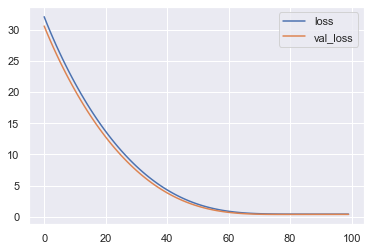

In [373]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(historyRegressorModel.history['loss'], label='loss')
plt.plot(historyRegressorModel.history['val_loss'], label='val_loss')
plt.legend()

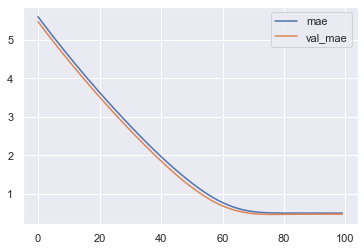

In [374]:
# Plot accuracy per iteration
plt.plot(historyRegressorModel.history['mae'], label='mae')
plt.plot(historyRegressorModel.history['val_mae'], label='val_mae')
plt.legend()

In [375]:
####################################### Lets Predict and check the model ################################################

In [376]:
# Lets print final scores
# metric mae

regressorModel.evaluate(np.array(NN_X_Test),np.array(NN_Y_Test))

10/10 [==============================] - 0s 2ms/step - loss: 0.3842 - mae: 0.4770


[0.38424092531204224, 0.4769623279571533]

In [377]:
NNPredictions=regressorModel.predict(np.array(NN_X_Test))

NNPredictionsTrain=regressorModel.predict(np.array(NN_X_Train))

In [378]:
#FinalDF= pd.DataFrame(X_Test.copy())
#FinalDF['Actual_Output']=np.array(Y_Test)
#FinalDF['Predicted_Output']=NNPredictions
#FinalDF

In [379]:
# Let us also check R square score of this model
from  sklearn.metrics import r2_score

rsquareTrain=r2_score(NN_Y_Train, NNPredictionsTrain)
rsquareTest=r2_score(NN_Y_Test, NNPredictions)
print("rsquareTrain",rsquareTrain)
print("rsquareTest",rsquareTest)

rsquareTrain 0.37424793176168225
rsquareTest 0.3245855550332293


In [380]:
# Capturing best results from above epoch
ResultsDF=ResultsDF.append({ 'Model_Type' :"Neural Network",'TrainData_Loss':best_train_score,'TestData_Loss':best_test_score,'Comments':optimizationConfig},ignore_index=True)
ResultsDF

,Model_Type,TrainData_Loss,TestData_Loss,Comments
0,Neural Network,0.5043513,0.4706780,"Baseline:No Hidden Layers,No Activation"


In [381]:
######################################## Result ############################################################################
# -Basic Model is at power with a simple linear gression model
# Think of this as a baseline measure of performace
# -Lets proceed , lets try to add activation layers ,hidden layers etc.

In [382]:
## Blank Space

### 5.0.2 Add Activation Function
-Add non linear Activation Function(as it is a Regression problem)                                                               
-Use relu and he weights intitilaisation                                                                                         
-Check if there is an improvment in results

In [383]:
# Configuration for architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initializing the model
regressorModel = Sequential()
# Add one layer to begin with 
regressorModel.add(Dense(input_dim = 11, units=1,activation='relu', kernel_initializer='he_normal'))
optimizationConfig="Activation Added"

In [384]:
from tensorflow.keras import optimizers

# Configuration for compiler
adam = optimizers.Adam(lr = 0.001)
regressorModel.compile(optimizer=adam, loss='mse',metrics=['mae'])

In [385]:
# Fit the model
historyRegressorModel=regressorModel.fit(NN_X_Train,NN_Y_Train, epochs=100,batch_size=12,validation_data=(NN_X_Test,NN_Y_Test))

#regressorModel.fit(X_Train,Y_Train, epochs=20,batch_size=12,validation_data=(X_Test,Y_Test))

Epoch 1/100
107/107 [==============================] - 0s 3ms/step - loss: 25.8003 - mae: 4.9479 - val_loss: 24.2123 - val_mae: 4.7812
Epoch 2/100
107/107 [==============================] - 0s 2ms/step - loss: 24.6674 - mae: 4.8049 - val_loss: 23.1845 - val_mae: 4.6407
Epoch 3/100
107/107 [==============================] - 0s 2ms/step - loss: 23.6641 - mae: 4.6682 - val_loss: 22.2858 - val_mae: 4.5095
Epoch 4/100
107/107 [==============================] - 0s 2ms/step - loss: 22.7650 - mae: 4.5389 - val_loss: 21.4608 - val_mae: 4.3851
Epoch 5/100
107/107 [==============================] - 0s 2ms/step - loss: 21.9729 - mae: 4.4176 - val_loss: 20.7152 - val_mae: 4.2765
Epoch 6/100
107/107 [==============================] - 0s 2ms/step - loss: 21.2716 - mae: 4.3079 - val_loss: 20.0616 - val_mae: 4.1789
Epoch 7/100
107/107 [==============================] - 0s 2ms/step - loss: 20.6369 - mae: 4.2071 - val_loss: 19.4564 - val_mae: 4.0861
Epoch 8/100
107/107 [==============================] - 

In [386]:
best_train_score = min(historyRegressorModel.history['mae'])
best_test_score = min(historyRegressorModel.history['val_mae'])
print(best_train_score,best_test_score)

0.5053501725196838 0.4801538586616516


In [387]:
# Capturing best results from above epoch
ResultsDF=ResultsDF.append({ 'Model_Type' :"Neural Network",'TrainData_Loss':best_train_score,'TestData_Loss':best_test_score,'Comments':optimizationConfig},ignore_index=True)
ResultsDF

,Model_Type,TrainData_Loss,TestData_Loss,Comments
0,Neural Network,0.5043513,0.4706780,"Baseline:No Hidden Layers,No Activation"
1,Neural Network,0.5053502,0.4801539,Activation Added


In [388]:
######################################## Result ############################################################################
# No improvment observed fter added activation functions
# -Lets proceed , lets try to add hidden layers

In [389]:
## Blank Space

### 5.0.3 Add hidden layers to Neural Network model
-Add  hidden layers                                                                                              
-Start with one layer                                                                                                           
-Test The network

In [390]:
############################################# Add one layer ##############################################################

In [391]:
# Configuration for architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initializing the model
regressorModel = Sequential()
# Add one layer to begin with 
regressorModel.add(Dense(input_dim = 11, units=24,activation='relu', kernel_initializer='he_normal'))
regressorModel.add(Dense(units=1,activation='relu', kernel_initializer='he_normal'))
optimizationConfig="Added 1 hidden layer with Activations"

In [392]:
from tensorflow.keras import optimizers

# Configuration for compiler
adam = optimizers.Adam(lr = 0.001)
regressorModel.compile(optimizer=adam, loss='mse',metrics=['mae'])

In [393]:
# Fit the model
historyRegressorModel=regressorModel.fit(NN_X_Train,NN_Y_Train, epochs=100,batch_size=12,validation_data=(NN_X_Test,NN_Y_Test))

#regressorModel.fit(X_Train,Y_Train, epochs=20,batch_size=12,validation_data=(X_Test,Y_Test))

Epoch 1/100
107/107 [==============================] - 0s 4ms/step - loss: 26.9720 - mae: 5.0948 - val_loss: 17.0496 - val_mae: 4.0005
Epoch 2/100
107/107 [==============================] - 0s 2ms/step - loss: 10.6791 - mae: 3.0023 - val_loss: 5.4010 - val_mae: 2.0203
Epoch 3/100
107/107 [==============================] - 0s 2ms/step - loss: 3.6501 - mae: 1.5989 - val_loss: 2.7490 - val_mae: 1.3278
Epoch 4/100
107/107 [==============================] - 0s 2ms/step - loss: 2.2917 - mae: 1.2221 - val_loss: 2.3631 - val_mae: 1.2262
Epoch 5/100
107/107 [==============================] - 0s 2ms/step - loss: 1.9926 - mae: 1.1356 - val_loss: 2.1213 - val_mae: 1.1628
Epoch 6/100
107/107 [==============================] - 0s 2ms/step - loss: 1.8013 - mae: 1.0789 - val_loss: 1.9366 - val_mae: 1.1096
Epoch 7/100
107/107 [==============================] - 0s 2ms/step - loss: 1.6579 - mae: 1.0370 - val_loss: 1.8013 - val_mae: 1.0695
Epoch 8/100
107/107 [==============================] - 0s 2ms/step

In [394]:
best_train_score = min(historyRegressorModel.history['mae'])
best_test_score = min(historyRegressorModel.history['val_mae'])
print(best_train_score,best_test_score)

0.4459742605686188 0.5159494280815125


In [395]:
# Capturing best results from above epoch
ResultsDF=ResultsDF.append({ 'Model_Type' :"Neural Network",'TrainData_Loss':best_train_score,'TestData_Loss':best_test_score,'Comments':optimizationConfig},ignore_index=True)
ResultsDF

,Model_Type,TrainData_Loss,TestData_Loss,Comments
0,Neural Network,0.5043513,0.4706780,"Baseline:No Hidden Layers,No Activation"
1,Neural Network,0.5053502,0.4801539,Activation Added
2,Neural Network,0.4459743,0.5159494,Added 1 hidden layer with Activations


In [396]:
######################################## Result ############################################################################
# No improvment observed , results worsened

In [397]:
############################################# Add 2 layers ##############################################################

In [398]:
# Configuration for architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initializing the model
regressorModel = Sequential()
# Add one layer to begin with 
regressorModel.add(Dense(input_dim = 11, units=24,activation='relu', kernel_initializer='he_normal'))
regressorModel.add(Dense(units=24,activation='relu', kernel_initializer='he_normal'))
regressorModel.add(Dense(units=1,activation='relu', kernel_initializer='he_normal'))
optimizationConfig="Added 2 hidden layer with Activations"

In [399]:
from tensorflow.keras import optimizers

# Configuration for compiler
adam = optimizers.Adam(lr = 0.001)
regressorModel.compile(optimizer=adam, loss='mse',metrics=['mae'])

In [400]:
# Fit the model
historyRegressorModel=regressorModel.fit(NN_X_Train,NN_Y_Train, epochs=100,batch_size=12,validation_data=(NN_X_Test,NN_Y_Test))

#regressorModel.fit(X_Train,Y_Train, epochs=20,batch_size=12,validation_data=(X_Test,Y_Test))

Epoch 1/100
107/107 [==============================] - 0s 4ms/step - loss: 10.6860 - mae: 2.7919 - val_loss: 3.9889 - val_mae: 1.5866
Epoch 2/100
107/107 [==============================] - 0s 2ms/step - loss: 2.8636 - mae: 1.3655 - val_loss: 2.7879 - val_mae: 1.2910
Epoch 3/100
107/107 [==============================] - 0s 2ms/step - loss: 2.1896 - mae: 1.1751 - val_loss: 2.2504 - val_mae: 1.1660
Epoch 4/100
107/107 [==============================] - 0s 2ms/step - loss: 1.8496 - mae: 1.0787 - val_loss: 1.9583 - val_mae: 1.0903
Epoch 5/100
107/107 [==============================] - 0s 2ms/step - loss: 1.6245 - mae: 1.0115 - val_loss: 1.7300 - val_mae: 1.0253
Epoch 6/100
107/107 [==============================] - 0s 2ms/step - loss: 1.4477 - mae: 0.9544 - val_loss: 1.5592 - val_mae: 0.9751
Epoch 7/100
107/107 [==============================] - 0s 2ms/step - loss: 1.3074 - mae: 0.9075 - val_loss: 1.4885 - val_mae: 0.9571
Epoch 8/100
107/107 [==============================] - 0s 2ms/step -

In [401]:
best_train_score = min(historyRegressorModel.history['mae'])
best_test_score = min(historyRegressorModel.history['val_mae'])
print(best_train_score,best_test_score)

0.3822934329509735 0.490576833486557


In [402]:
# Capturing best results from above epoch
ResultsDF=ResultsDF.append({ 'Model_Type' :"Neural Network",'TrainData_Loss':best_train_score,'TestData_Loss':best_test_score,'Comments':optimizationConfig},ignore_index=True)
ResultsDF

,Model_Type,TrainData_Loss,TestData_Loss,Comments
0,Neural Network,0.5043513,0.4706780,"Baseline:No Hidden Layers,No Activation"
1,Neural Network,0.5053502,0.4801539,Activation Added
2,Neural Network,0.4459743,0.5159494,Added 1 hidden layer with Activations
3,Neural Network,0.3822934,0.4905768,Added 2 hidden layer with Activations


In [403]:
######################################## Result ############################################################################
# Slight increase in performace from previous run
# But this is still not hihger than basec neural netwrok model

In [404]:
## Blank Space ### 

## Blank Space ###



-- A very basic Neural Network with no hidden layer was able to model data very well(Result no 0 in Result Table above)

-- Further addition of layers and activations did not help increase performance

-- Regressor Model was able to acheive an MAE loss of close to 0(0.47 to be precise) on validation/test data 



In [405]:
## Blank Space

## Blank Space

### Retrieve Best Model
-- Lets us retrieve best model from our trials so we can  pickle it 

In [406]:
############################################ Let us retrieve the best model ##################################################

In [407]:
# Let us now do a call back on our very first model configuration

In [408]:
# Configuration for architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


# Initializing the model
regressorModel = Sequential()
# Add one layer to begin with 
regressorModel.add(Dense(input_dim = 11, units=1))
optimizationConfig="Baseline:No Hidden Layers,No Activation"

# simple early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 , patience=25)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


In [409]:
from tensorflow.keras import optimizers

# Configuration for compiler
adam = optimizers.Adam(lr = 0.001)
regressorModel.compile(optimizer=adam, loss='mse',metrics=['mae'])

In [410]:
# Fit the model
historyRegressorModel=regressorModel.fit(NN_X_Train,NN_Y_Train, epochs=100,batch_size=12,validation_data=(NN_X_Test,NN_Y_Test), callbacks=[mc])

#regressorModel.fit(X_Train,Y_Train, epochs=20,batch_size=12,validation_data=(X_Test,Y_Test))

Epoch 1/100
 79/107 [=====================>........] - ETA: 0s - loss: 33.7173 - mae: 5.6290
Epoch 00001: val_loss improved from inf to 31.54129, saving model to best_model.h5
107/107 [==============================] - 0s 3ms/step - loss: 33.3220 - mae: 5.5989 - val_loss: 31.5413 - val_mae: 5.4714
Epoch 2/100
 73/107 [===================>..........] - ETA: 0s - loss: 32.2541 - mae: 5.5273
Epoch 00002: val_loss improved from 31.54129 to 30.20130, saving model to best_model.h5
107/107 [==============================] - 0s 2ms/step - loss: 31.8951 - mae: 5.4936 - val_loss: 30.2013 - val_mae: 5.3660
Epoch 3/100
107/107 [==============================] - ETA: 0s - loss: 30.5499 - mae: 5.3883
Epoch 00003: val_loss improved from 30.20130 to 28.93905, saving model to best_model.h5
107/107 [==============================] - 0s 2ms/step - loss: 30.5499 - mae: 5.3883 - val_loss: 28.9391 - val_mae: 5.2616
Epoch 4/100
103/107 [===========================>..] - ETA: 0s - loss: 29.2695 - mae: 5.2834


In [411]:
# Get the model

# Get the best model
from keras.models import load_model

saved_model = load_model('best_model.h5')

In [412]:
# Cross verify score on Validation data of the best model

saved_model.evaluate(np.array(NN_X_Test),np.array(NN_Y_Test))

# Looks good

10/10 [==============================] - 0s 1ms/step - loss: 0.3818 - mean_absolute_error: 0.4705


[0.3818255662918091, 0.47045475244522095]

In [413]:
######################################## Result ############################################################################
# Retrieved the best model

In [414]:
## Blank Space

### Pickle Model

In [415]:
model = saved_model
model.save('FinalModel')

INFO:tensorflow:Assets written to: FinalModel\assets


## Final Result

-- A very basic Neural Network with no hidden layers was able to model data very well(Result no 0 in Result Table above)

-- Further addition of layers and activations did not help increase performance

-- Regressor Model was able to acheive an MAE loss of close to 0(0.47 to be precise) on validation/test data 

